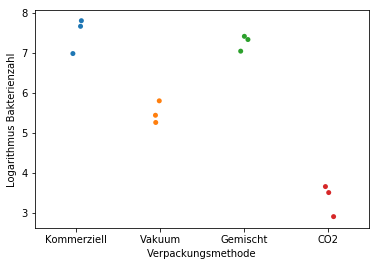

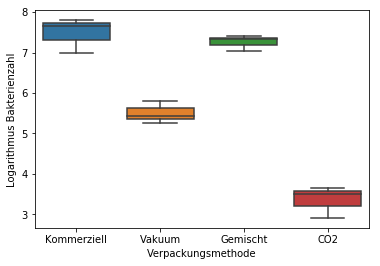

In [4]:
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = DataFrame({
'Treatment': np.repeat(['Kommerziell', 'Vakuum', 'Gemischt', 'CO2'], [3, 3,
3, 3]),
'steak_id':[7.66, 6.98, 7.80, 5.26, 5.44, 5.80, 7.41, 7.33, 7.04, 3.51,
2.91, 3.66]
})
sns.stripplot(x='Treatment', y='steak_id', data=df)
plt.xlabel('Verpackungsmethode')
plt.ylabel('Logarithmus Bakterienzahl')
plt.show()
sns.boxplot(x='Treatment', y='steak_id', data=df)
plt.xlabel('Verpackungsmethode')
plt.ylabel('Logarithmus Bakterienzahl')
plt.show()


In [2]:
import numpy as np
help(np.random.choice)

Help on built-in function choice:

choice(...) method of mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    Parameters
    -----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry in a.
        If not given the sample assumes a uniform distribution over all
        entries in a.
    
    Returns
    --------
    samples : single item o

In [2]:
from pandas import DataFrame
import scipy.stats as st
import numpy as np
import seaborn as sns
rf = DataFrame({
"HC": np.repeat(["5%", "10%", "15%", "20%"], [3, 9, 6, 6]),
"Strength":[7, 8, 15, 11, 9, 10, 12, 17, 13, 18, 19, 15, 14, 18, 19, 17, 16,
18, 19, 25, 22, 23, 18, 20]
})
per5 = rf.loc[rf["HC"]=="5%", "Strength"]
per10 = rf.loc[rf["HC"]=="10%", "Strength"]
per15 = rf.loc[rf["HC"]=="15%", "Strength"]
per20 = rf.loc[rf["HC"]=="20%", "Strength"]
st.ttest_ind(per10,per20)
print(st.ttest_ind(per10,per20))

     HC  Strength
0    5%         7
1    5%         8
2    5%        15
3   10%        11
4   10%         9
5   10%        10
6   10%        12
7   10%        17
8   10%        13
9   10%        18
10  10%        19
11  10%        15
12  15%        14
13  15%        18
14  15%        19
15  15%        17
16  15%        16
17  15%        18
18  20%        19
19  20%        25
20  20%        22
21  20%        23
22  20%        18
23  20%        20
Ttest_indResult(statistic=-4.266145801540309, pvalue=0.0009192142893560607)


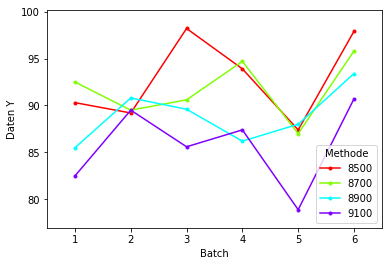

In [2]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
Daten = DataFrame({
"Batch": np.tile(["1", "2", "3", "4", "5", "6"], 4),
"Methode": np.repeat(["8500", "8700", "8900", "9100"], 6),
"Y": np.array([90.3, 89.2, 98.2, 93.9, 87.4, 97.9, 92.5, 89.5, 90.6, 94.7, 87, 95.8,
85.5,
90.8, 89.6, 86.2, 88, 93.4, 82.5, 89.5, 85.6, 87.4, 78.9, 90.7])
})
interaction_plot(x=Daten["Batch"], trace=Daten["Methode"], response=Daten["Y"])
plt.ylabel("Daten Y")
plt.show()


In [7]:
from patsy.contrasts import Sum
fit = ols("Y ~ C(Methode, Sum)+C(Batch,Sum)", data=Daten).fit()
fit.params

Intercept                  89.795833
C(Methode, Sum)[S.8500]     3.020833
C(Methode, Sum)[S.8700]     1.887500
C(Methode, Sum)[S.8900]    -0.879167
C(Batch, Sum)[S.1]         -2.095833
C(Batch, Sum)[S.2]         -0.045833
C(Batch, Sum)[S.3]          1.204167
C(Batch, Sum)[S.4]          0.754167
C(Batch, Sum)[S.5]         -4.470833
dtype: float64

In [8]:
from statsmodels.stats.anova import anova_lm

anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,8.107077,0.001916
"C(Batch, Sum)",5.0,192.252083,38.450417,5.248666,0.005532
Residual,15.0,109.886250,7.325750,NaN,NaN


In [10]:
from patsy.contrasts import Sum
fit = ols("Y ~ C(Methode, Sum)", data=Daten).fit()
anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Methode, Sum)",3.0,178.171250,59.390417,3.931339,0.023448
Residual,20.0,302.138333,15.106917,NaN,NaN


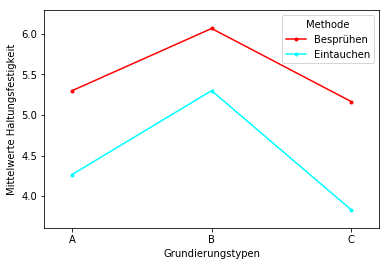

In [11]:
Farbe = DataFrame({
"Grund": np.repeat(["A", "B", "C"], 6),
"Methode": np.tile(np.repeat(["Eintauchen", "Besprühen"], 3), 3),
"Y": np.array([4, 4.5, 4.3, 5.4, 4.9, 5.6, 5.6, 4.9, 5.4, 5.8, 6.1, 6.3,
3.8, 3.7, 4, 5.5, 5, 5])
})
interaction_plot(x=Farbe["Grund"], trace=Farbe["Methode"],
response=Farbe["Y"])
plt.xlabel("Grundierungstypen")
plt.ylabel("Mittelwerte Haltungsfestigkeit")
plt.show()

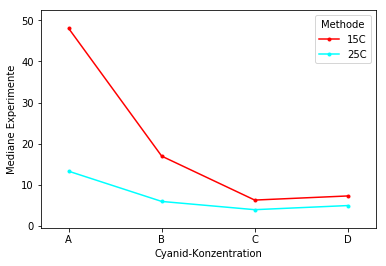

In [13]:
El = DataFrame({
"Konz": np.repeat(["A", "B", "C","D"], 6),
"Temp": np.tile(np.repeat(["15C", "25C"],3),4),
"Y": np.array([82, 46, 16, 20, 13, 7, 20, 14, 17, 6, 7, 5, 8, 6, 5, 4, 3, 5,
10, 7, 5, 6, 4, 5])
})
interaction_plot(x=El["Konz"], trace=El["Temp"], response=El["Y"],
legendtitle="Methode")
plt.xlabel("Cyanid-Konzentration")
plt.ylabel("Mediane Experimente")
plt.show()


In [15]:
El = DataFrame({
"Konz": np.repeat(["A", "B", "C","D"], 6),
"Temp": np.tile(np.repeat(["15C", "25C"],3),4),
"Y": np.array([82, 46, 16, 20, 13, 7, 20, 14, 17, 6, 7, 5, 8, 6, 5, 4, 3, 5,
10, 7, 5, 6, 4, 5])
})
fit = ols("Y~C(Konz,Sum)*C(Temp,Sum)",data=El).fit()
fit.params


Intercept                                13.375000
C(Konz, Sum)[S.A]                        17.291667
C(Konz, Sum)[S.B]                        -1.875000
C(Konz, Sum)[S.C]                        -8.208333
C(Temp, Sum)[S.15C]                       6.291667
C(Konz, Sum)[S.A]:C(Temp, Sum)[S.15C]    11.041667
C(Konz, Sum)[S.B]:C(Temp, Sum)[S.15C]    -0.791667
C(Konz, Sum)[S.C]:C(Temp, Sum)[S.15C]    -5.125000
dtype: float64

In [16]:
from statsmodels.stats.anova import anova_lm

anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
"C(Konz, Sum)",3.0,2531.125000,843.708333,5.843867,0.006803
"C(Temp, Sum)",1.0,950.041667,950.041667,6.580375,0.020754
"C(Konz, Sum):C(Temp, Sum)",3.0,1050.458333,350.152778,2.425301,0.103439
Residual,16.0,2310.000000,144.375000,NaN,NaN


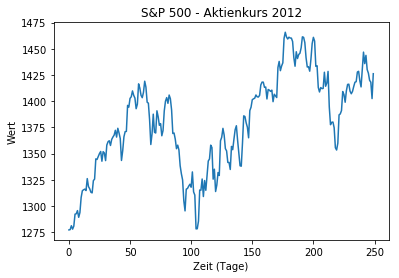

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import numpy as np

sp2012 = pd.read_table(r'sp2012.txt')
df = DataFrame(sp2012)
plt.plot(df)
plt.xlabel("Zeit (Tage)")
plt.ylabel("Wert")
plt.title('S&P 500 - Aktienkurs 2012')
plt.show()


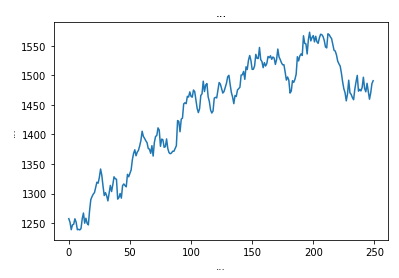

In [64]:
from scipy.stats import norm
steps = np.array(norm.rvs(size=250, loc=0.483, scale=11))
sp_simulated = np.empty([250])
sp_simulated[0] = 1257.6
for i in range(249):
    sp_simulated[i+1] = sp_simulated[i]+ steps[i]
    
plt.plot(sp_simulated)
plt.xlabel("...")
plt.ylabel("...")
plt.title('...')
plt.show()



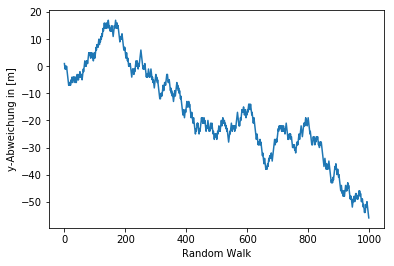

In [205]:
import matplotlib.pyplot as plt
import numpy as np
d = np.random.choice(a=[-1,1], size=1000, replace=True)
x = np.cumsum(d)
plt.plot(x)
plt.xlabel("Random Walk")
plt.ylabel("y-Abweichung in [m]")
plt.show()

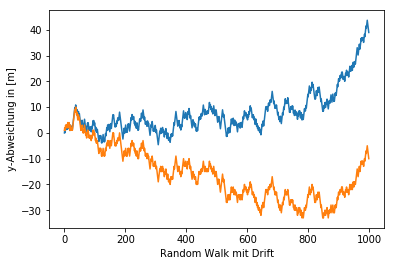

In [243]:
np.random.seed(35)
d = np.random.choice(a=[-1,1], size=1000, replace=True)
delta = 5*10**(-2)
x = np.cumsum(d)
y = np.zeros(1000)
for i in range(1,1000):
    y[i] = delta+y[i-1]+d[i]
plt.plot(y)
plt.plot(x)
plt.xlabel("Random Walk mit Drift")
plt.ylabel("y-Abweichung in [m]")
plt.show()
